In [529]:
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [530]:
df = pd.read_csv('/content/Yellow_Taxi_Assignment.csv')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,3.5,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,6.0,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,9.5,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304973,1,2023-01-31 00:11:27,2023-01-31 00:38:56,1.0,9.90,99.0,N,48,47,1,35.5,0.0,0.5,0.00,0.0,1.0,37.00,0.0,0.0
304974,2,2023-01-31 16:06:08,2023-01-31 16:52:18,1.0,8.27,1.0,N,87,75,2,44.3,2.5,0.5,0.00,0.0,1.0,50.80,2.5,0.0
304975,2,2023-01-31 15:31:38,2023-01-31 15:44:48,1.0,0.71,1.0,N,236,236,2,12.1,0.0,0.5,0.00,0.0,1.0,16.10,2.5,0.0
304976,1,2023-01-31 20:35:17,2023-01-31 20:42:56,1.0,1.80,1.0,N,141,170,2,10.7,3.5,0.5,0.00,0.0,1.0,15.70,2.5,0.0


#  Explore, clean, process

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304978 entries, 0 to 304977
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               304978 non-null  int64  
 1   tpep_pickup_datetime   304978 non-null  object 
 2   tpep_dropoff_datetime  304978 non-null  object 
 3   passenger_count        295465 non-null  float64
 4   trip_distance          304978 non-null  float64
 5   RatecodeID             295465 non-null  float64
 6   store_and_fwd_flag     295465 non-null  object 
 7   PULocationID           304978 non-null  int64  
 8   DOLocationID           304978 non-null  int64  
 9   payment_type           304978 non-null  int64  
 10  fare_amount            304978 non-null  float64
 11  extra                  304978 non-null  float64
 12  mta_tax                304978 non-null  float64
 13  tip_amount             304978 non-null  float64
 14  tolls_amount           304978 non-nu

In [532]:
# convert timestamps to datetime format

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [533]:
# add hour_of_day, day_of_week, day_of_month, month, year and year_month columns

df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['day_of_month'] = df['tpep_pickup_datetime'].dt.day
df['month'] = df['tpep_pickup_datetime'].dt.month
df['year'] = df['tpep_pickup_datetime'].dt.year
df['year_month'] = df['tpep_pickup_datetime'].dt.to_period('M')

In [534]:
# add trip duration in minutes

df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['trip_duration_minutes'] = df['trip_duration_minutes'].round(2)

In [535]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,hour_of_day,day_of_week,day_of_month,month,year,year_month,trip_duration_minutes
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,...,5.59,NaN,NaN,12,Monday,1,1,2018,2018-01,2.07
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,...,7.82,NaN,NaN,12,Monday,1,1,2018,2018-01,4.68
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,...,12.42,NaN,NaN,1,Monday,1,1,2018,2018-01,11.07
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,...,10.80,NaN,NaN,8,Monday,1,1,2018,2018-01,9.77
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,...,14.80,NaN,NaN,1,Monday,1,1,2018,2018-01,13.95


### For the sake of a more generalized analysis I will remove trips with payment_type = no charge (3), since I ignore its causes:

In [536]:
df = df[df['payment_type'] != 3]

In [537]:
# cast booleans as ints

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'Y': 1, 'N': 0})

<ipython-input-537-d3f64b119893>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'Y': 1, 'N': 0})
<ipython-input-537-d3f64b119893>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'Y': 1, 'N': 0})


In [538]:
# make sure there are no entries with zero passengers

df = df[df['passenger_count'] > 0]

In [539]:
# check earliest and latest data point

print(f"min date: {df['tpep_pickup_datetime'].min()}")
print(f"max date: {df['tpep_pickup_datetime'].max()}")

min date: 2018-01-01 00:25:49
max date: 2023-01-31 23:57:28


In [540]:
# add unique id

df['trip_id'] = range(1, len(df) + 1)

<ipython-input-540-7069a84ad7d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_id'] = range(1, len(df) + 1)


## Check if the values for relevant numerical features make sense:

In [541]:
print(f"min fare amount value: {df['fare_amount'].min()}")
print(f"min toll amount value: {df['tolls_amount'].min()}")
print(f"min total amount value: {df['total_amount'].min()}")
print(f"min trip distance: {df['trip_distance'].min()}")

min fare amount value: -197.0
min toll amount value: -13.75
min total amount value: -198.55
min trip distance: 0.0


In [542]:
# remove entries with trip_distance 0

df = df[df['trip_distance'] > 0]

In [543]:
# see what the entries with negative fare_amount look like

sort_by_fare = df.sort_values(by='fare_amount', ascending=True)
sort_by_fare.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,hour_of_day,day_of_week,day_of_month,month,year,year_month,trip_duration_minutes,trip_id
268367,2,2022-06-21 11:54:41,2022-06-21 13:06:01,1.0,36.41,5.0,0.0,216,265,2,...,0.0,-1.25,11,Tuesday,21,6,2022,2022-06,71.33,253805
299684,2,2022-12-29 13:58:19,2022-12-29 14:36:07,3.0,17.14,3.0,0.0,48,1,4,...,0.0,0.00,13,Thursday,29,12,2022,2022-12,37.80,283275
248563,2,2022-02-21 17:24:31,2022-02-21 18:12:13,1.0,46.46,4.0,0.0,132,265,2,...,0.0,-1.25,17,Monday,21,2,2022,2022-02,47.70,235160
163017,2,2020-09-20 03:01:20,2020-09-20 03:03:52,1.0,0.04,5.0,0.0,264,264,4,...,0.0,NaN,3,Sunday,20,9,2020,2020-09,2.53,156349
300988,2,2023-01-07 18:07:29,2023-01-07 18:58:27,1.0,19.44,1.0,0.0,132,182,2,...,0.0,-1.25,18,Saturday,7,1,2023,2023-01,50.97,284514
303669,2,2023-01-24 08:35:27,2023-01-24 09:14:55,2.0,14.16,2.0,0.0,215,234,4,...,-2.5,-1.25,8,Tuesday,24,1,2023,2023-01,39.47,287069
304548,2,2023-01-29 10:56:18,2023-01-29 11:25:17,1.0,18.55,1.0,0.0,132,49,4,...,0.0,-1.25,10,Sunday,29,1,2023,2023-01,28.98,287907
160150,2,2020-09-02 06:54:46,2020-09-02 07:21:36,1.0,17.74,3.0,0.0,230,1,2,...,0.0,NaN,6,Wednesday,2,9,2020,2020-09,26.83,153728
292351,2,2022-11-13 19:02:50,2022-11-13 19:53:49,1.0,20.19,1.0,0.0,164,6,4,...,-2.5,0.00,19,Sunday,13,11,2022,2022-11,50.98,276354
301086,2,2023-01-08 13:01:20,2023-01-08 13:42:08,1.0,12.50,1.0,0.0,138,48,4,...,-2.5,-1.25,13,Sunday,8,1,2023,2023-01,40.80,284611


### A quick look shows that there is no correlation between `trip_distance` or `trip_duration`, and a negative `fare_amount` values.

In [544]:
# count rows with negative fare_amount

print(df[df['fare_amount'] < 0].shape[0])

732


In [545]:
# it's then safe to remove them and move on

df = df[df['fare_amount'] >= 0]

In [546]:
# add fare_amount per mile column

df['fare_amount_per_mile'] = (df['fare_amount'] / df['trip_distance']).round(2)

<ipython-input-546-8f9938fc909d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_amount_per_mile'] = (df['fare_amount'] / df['trip_distance']).round(2)


In [547]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,airport_fee,hour_of_day,day_of_week,day_of_month,month,year,year_month,trip_duration_minutes,trip_id,fare_amount_per_mile
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,0.0,142,163,1,...,NaN,12,Monday,1,1,2018,2018-01,2.07,1,6.60
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,0.0,140,236,1,...,NaN,12,Monday,1,1,2018,2018-01,4.68,2,5.71
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,0.0,211,158,1,...,NaN,1,Monday,1,1,2018,2018-01,11.07,3,5.19
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,0.0,249,4,2,...,NaN,8,Monday,1,1,2018,2018-01,9.77,4,4.35
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,0.0,186,142,1,...,NaN,1,Monday,1,1,2018,2018-01,13.95,5,4.08


## Treat airport trips (JFK & Newark) separately

In [548]:
df_regular = df[(df['RatecodeID'] != 2) & (df['RatecodeID'] != 3)]
df_airport = df[(df['RatecodeID'] == 2) | (df['RatecodeID'] == 3)]

###Check distribution of trips type (regular/airport) for each vendor:

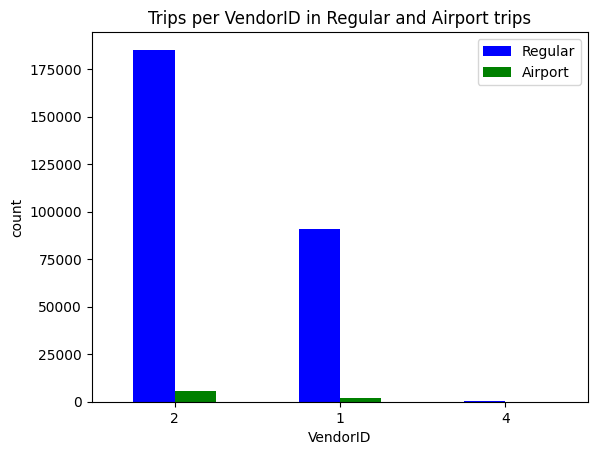

In [549]:
count_regular = df_regular['VendorID'].value_counts()
count_airport = df_airport['VendorID'].value_counts()

df_counts = pd.DataFrame({'Regular': count_regular,'Airport': count_airport}).fillna(0)

df_counts.plot(kind='bar', rot=0, color=['blue', 'green'])
plt.title("Trips per VendorID in Regular and Airport trips")
plt.xlabel("VendorID")
plt.ylabel("count")
plt.show()

The plot shows a VendorID not defined in dictionary

In [550]:
# keep only correct vendor IDs

df_regular = df_regular[(df_regular['VendorID'] == 1) | (df_regular['VendorID'] == 2)]
df_airport = df_airport[(df_airport['VendorID'] == 1) | (df_airport['VendorID'] == 2)]

---

# Visualize

## Trips count per year_month

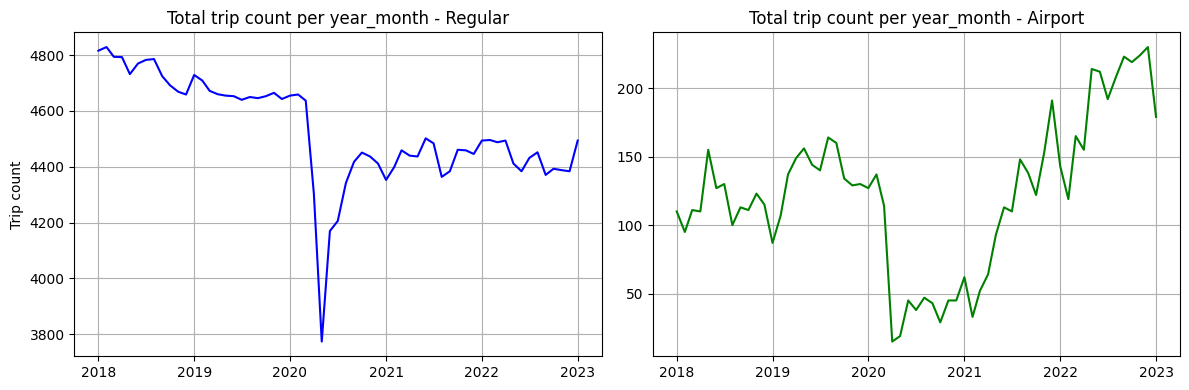

In [551]:
# regular trips
monthly_trip_counts_regular = df_regular.groupby('year_month')['trip_id'].count().reset_index()
monthly_trip_counts_regular.columns = ['year_month', 'trip_count']
monthly_trip_counts_regular['year_month'] = monthly_trip_counts_regular['year_month'].dt.to_timestamp()


# airport trips
monthly_trip_counts_airport = df_airport.groupby('year_month')['trip_id'].count().reset_index()
monthly_trip_counts_airport.columns = ['year_month', 'trip_count']
monthly_trip_counts_airport['year_month'] = monthly_trip_counts_airport['year_month'].dt.to_timestamp()



fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(monthly_trip_counts_regular['year_month'], monthly_trip_counts_regular['trip_count'], color='blue')
axes[0].set_ylabel('Trip count')
axes[0].set_title('Total trip count per year_month - Regular')
axes[0].grid(True)

axes[1].plot(monthly_trip_counts_airport['year_month'], monthly_trip_counts_airport['trip_count'], color='green')
axes[1].set_title('Total trip count per year_month - Airport')
axes[1].grid(True)

plt.tight_layout()
plt.show()


* Fall right at the beginning of COVID.
* Recovery for airport trips is slower, as expected. I would assume that when analysing Newark and JFK separately, will find an even slower recovery for JFK (international vs. domestic flights).

### Compare previous trends with fare trends

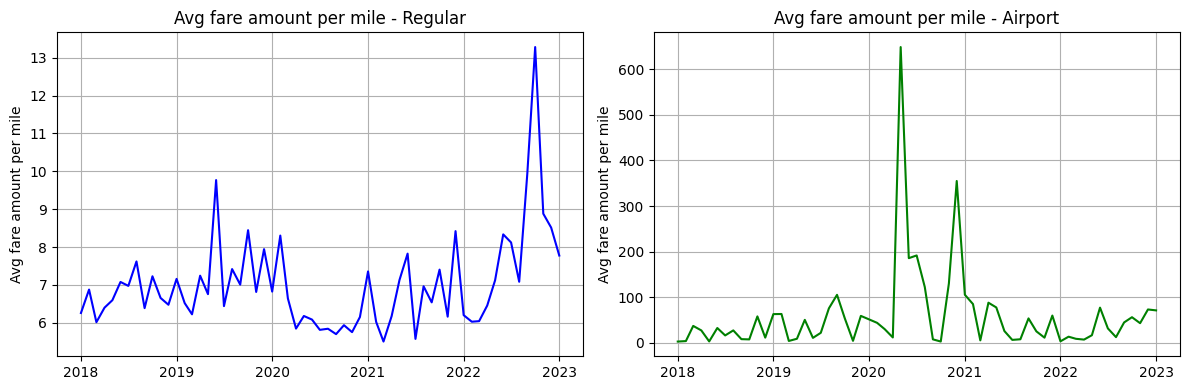

In [552]:
# regular trips
avg_fare_per_mile_regular = df_regular.groupby('year_month')['fare_amount_per_mile'].mean().reset_index()
avg_fare_per_mile_regular['year_month'] = avg_fare_per_mile_regular['year_month'].dt.to_timestamp()

# airport trips
avg_fare_per_mile_airport = df_airport.groupby('year_month')['fare_amount_per_mile'].mean().reset_index()
avg_fare_per_mile_airport['year_month'] = avg_fare_per_mile_airport['year_month'].dt.to_timestamp()


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(avg_fare_per_mile_regular['year_month'], avg_fare_per_mile_regular['fare_amount_per_mile'], color='blue')
axes[0].set_ylabel('Avg fare amount per mile')
axes[0].set_title('Avg fare amount per mile - Regular')
axes[0].grid(True)


axes[1].plot(avg_fare_per_mile_airport['year_month'], avg_fare_per_mile_airport['fare_amount_per_mile'], color='green')
axes[1].set_ylabel('Avg fare amount per mile')
axes[1].set_title('Avg fare amount per mile - Airport')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### For regular trips, the peak in the fare amount per mile at the end of 2022 - potentially explained by the raise in gas price - shows no impact in the trip count previously plotted.

## Seasonality

### Average count of trips per month of the year

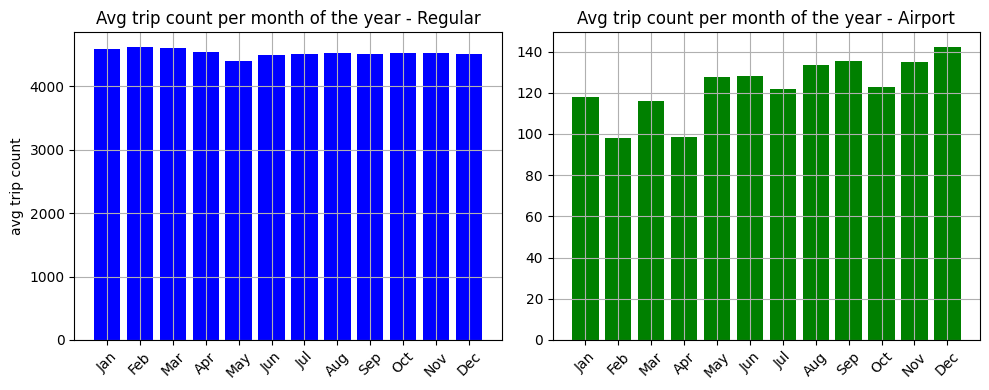

In [553]:
# regular
monthly_trip_count_regular = df_regular.groupby(['month', df_regular['year']])['trip_id'].count().reset_index()
monthly_trip_count_regular.columns = ['month', 'year', 'trip_count']
average_trip_count_per_month_regular = monthly_trip_count_regular.groupby('month')['trip_count'].mean().reset_index()

# airport
monthly_trip_count_airport = df_airport.groupby(['month', df_airport['year']])['trip_id'].count().reset_index()
monthly_trip_count_airport.columns = ['month', 'year', 'trip_count']
average_trip_count_per_month_airport = monthly_trip_count_airport.groupby('month')['trip_count'].mean().reset_index()



fig, axes = plt.subplots(1, 2, figsize=(10, 4))
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[0].bar(average_trip_count_per_month_regular['month'], average_trip_count_per_month_regular['trip_count'], color='blue')
axes[0].set_ylabel('avg trip count')
axes[0].set_title('Avg trip count per month of the year - Regular')
axes[0].grid(True)
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(month_labels, rotation=45)

# Plot for df_airport
axes[1].bar(average_trip_count_per_month_airport['month'], average_trip_count_per_month_airport['trip_count'], color='green')
axes[1].set_title('Avg trip count per month of the year - Airport')
axes[1].grid(True)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_labels, rotation=45)

plt.tight_layout()
plt.show()


## Hourly
Objective:
* Get average trips count and fare amount per hour of the day
* Cluster by semester to avoid over generalization
* Identify peak hours
* Identify how proportional are the changes in `fare_amount`'s trend to the changes in trips count


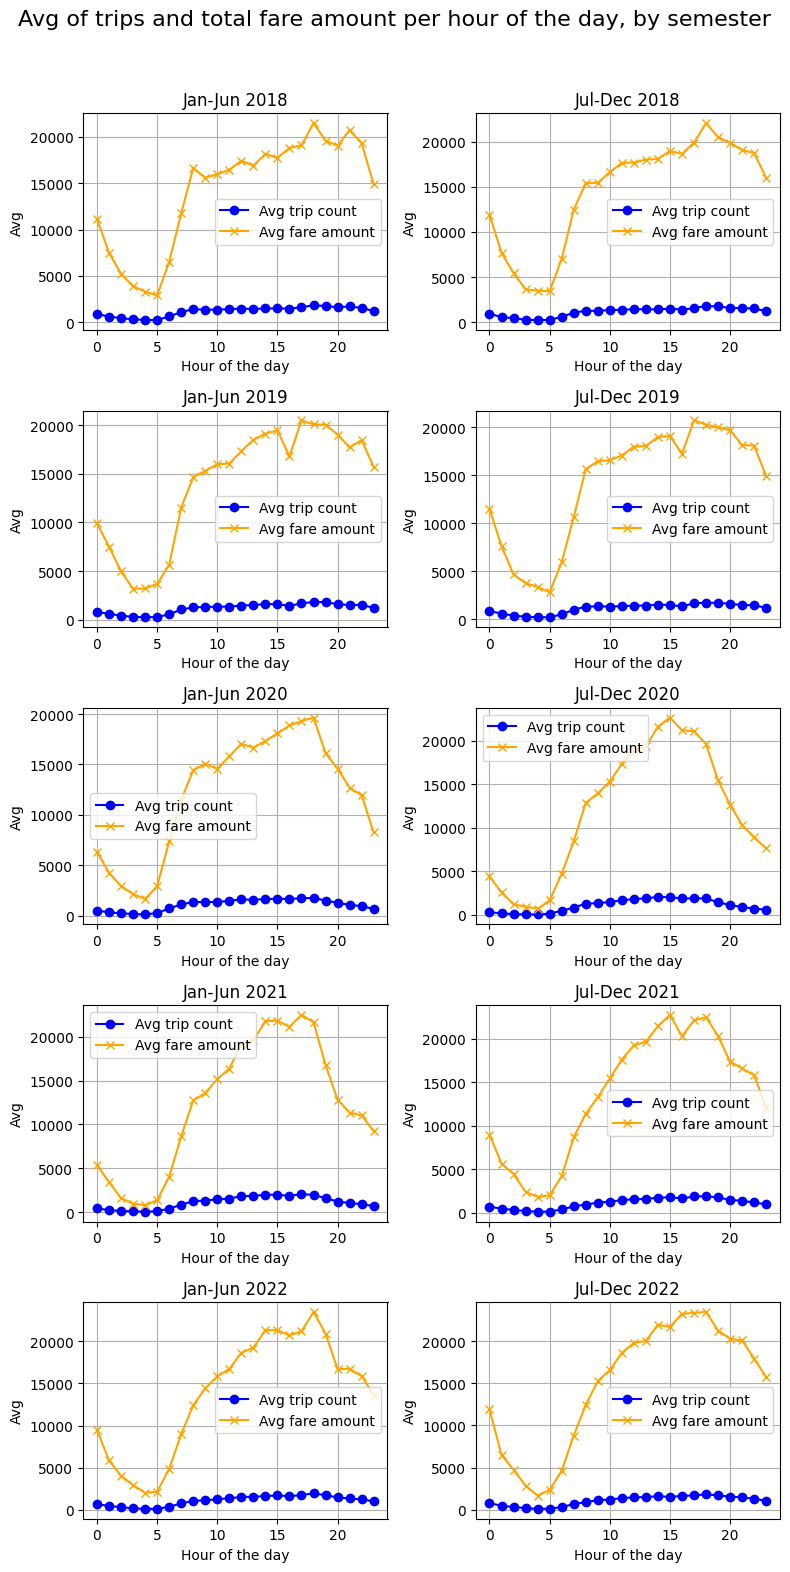

In [554]:
df_regular['semester'] = df_regular['month'] // 7 + 1

hourly_data_regular = df_regular.groupby(['year', 'semester', 'hour_of_day']).agg({'trip_id': 'count', 'fare_amount': 'sum'}).reset_index()
hourly_data_regular.columns = ['year', 'semester', 'hour_of_day', 'num_trips', 'total_fare_amount']

avg_hourly_data_regular = hourly_data_regular.groupby(['year', 'semester', 'hour_of_day']).agg({'num_trips': 'mean', 'total_fare_amount': 'mean'}).reset_index()


fig, axes = plt.subplots(5, 2, figsize=(8, 16))  # 5 years, 2 semesters each
fig.suptitle('Avg of trips and total fare amount per hour of the day, by semester', fontsize=16)

years = [2018, 2019, 2020, 2021, 2022]
semesters = ['Jan-Jun', 'Jul-Dec']

for i, year in enumerate(years):
    for j in range(2):  # 0 for first semester, 1 for second one
        semester_num = j + 1  # 1 for first semester, 2 for second one

        # filter data by year & semester
        data_regular = avg_hourly_data_regular[(avg_hourly_data_regular['year'] == year) & (avg_hourly_data_regular['semester'] == semester_num)]

        ax = axes[i, j]
        ax.plot(data_regular['hour_of_day'], data_regular['num_trips'], marker='o', label='Avg trip count', color='blue')
        ax.plot(data_regular['hour_of_day'], data_regular['total_fare_amount'], marker='x', label='Avg fare amount', color='orange')
        ax.set_title(f'{semesters[j]} {year}')
        ax.set_xlabel('Hour of the day')
        ax.set_ylabel('Avg')
        ax.grid()
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96]) #adjust to fit the screen
plt.show()


---

## Relation between count of trips and number of passengers per trip

### Objective: understand peak hours in terms of amount of people traveling instead of amount of trips

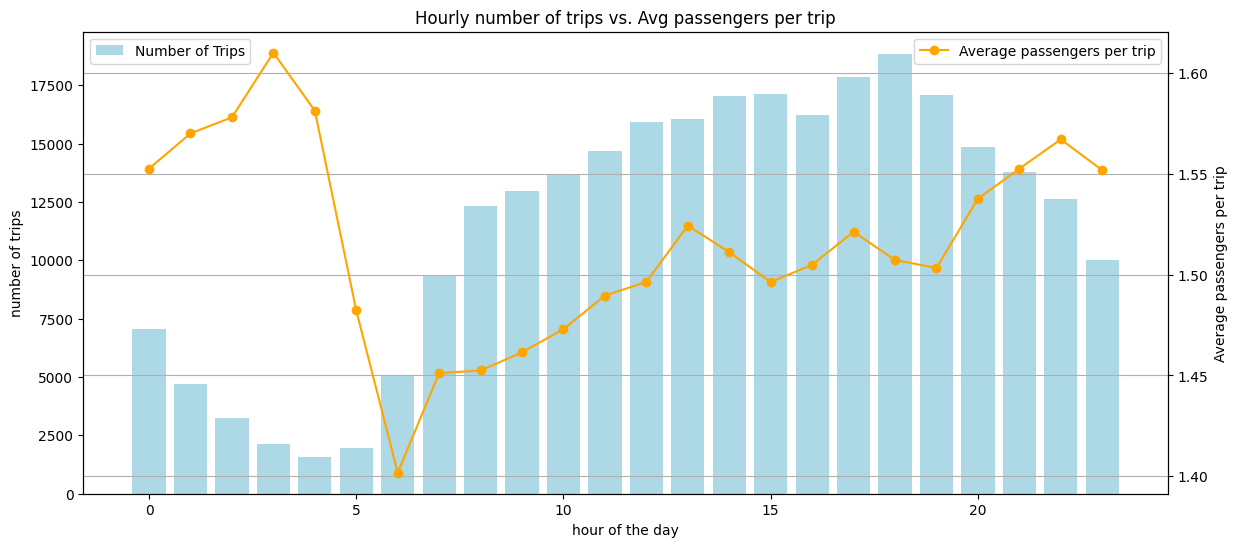

In [555]:
# group data by hour of the day and calculate total trips and avg number of passengers per trip
hourly_data = df_regular.groupby('hour_of_day').agg({'trip_id': 'count', 'passenger_count': 'mean'}).reset_index()
hourly_data.columns = ['hour_of_day', 'num_trips', 'avg_passengers']

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.bar(hourly_data['hour_of_day'], hourly_data['num_trips'], color='lightblue', label='Number of Trips')
ax1.set_xlabel('hour of the day')
ax1.set_ylabel('number of trips')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(hourly_data['hour_of_day'], hourly_data['avg_passengers'], color='orange', marker='o', label='Average passengers per trip')
ax2.set_ylabel('Average passengers per trip')
ax2.legend(loc='upper right')

plt.title('Hourly number of trips vs. Avg passengers per trip')
plt.grid(True)
plt.show()


### The hours with lowest number of trips matches peak in number of passengers
--> Explained by lower public transport frequency and being darker hours.

## Day of the month

###Objective: see if there is any relation between amount of trips and days of the month when Americans get their salary paid, clustering data based on yearly quarter (across all years)

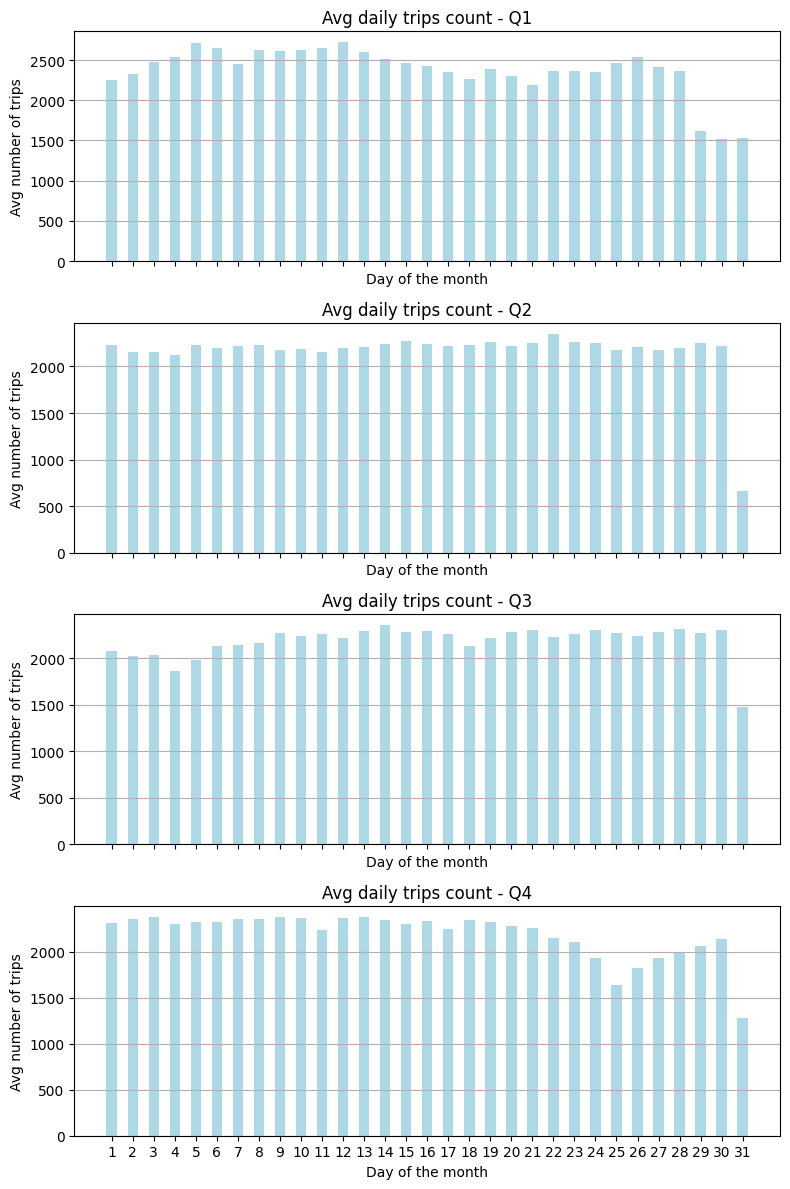

In [556]:
#  get quarter based on month
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

df_regular['quarter'] = df_regular['month'].apply(get_quarter)

daily_data = df_regular.groupby(['quarter', 'day_of_month'])['trip_id'].count().reset_index(name='num_trips')

avg_daily_trip_count = daily_data.groupby(['quarter', 'day_of_month'])['num_trips'].mean().reset_index()

# get list of unique quarters for the plots
quarters = avg_daily_trip_count['quarter'].unique()

fig, axes = plt.subplots(nrows=len(quarters), ncols=1, figsize=(8, 12), sharex=True)



for i, quarter in enumerate(quarters):
    quarter_data = avg_daily_trip_count[avg_daily_trip_count['quarter'] == quarter]
    axes[i].bar(quarter_data['day_of_month'], quarter_data['num_trips'], width=0.5, color='lightblue')
    axes[i].set_title(f"Avg daily trips count - {quarter}")
    axes[i].set_ylabel("Avg number of trips")
    axes[i].grid(axis='y')
    axes[i].set_xticks(range(1, 32))
    axes[i].set_xlabel("Day of the month")



plt.tight_layout()
plt.show()


## Explore correlation between tip amount, payment type, number of passengers and taxi "performance" (speed)

<ipython-input-557-9f649c11bdb7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_for_corr['trip_speed'] = np.where(df_reg_for_corr['trip_duration_minutes'] == 0, np.nan, (df_reg_for_corr['trip_distance'] / df_reg_for_corr['trip_duration_minutes']).round(2))


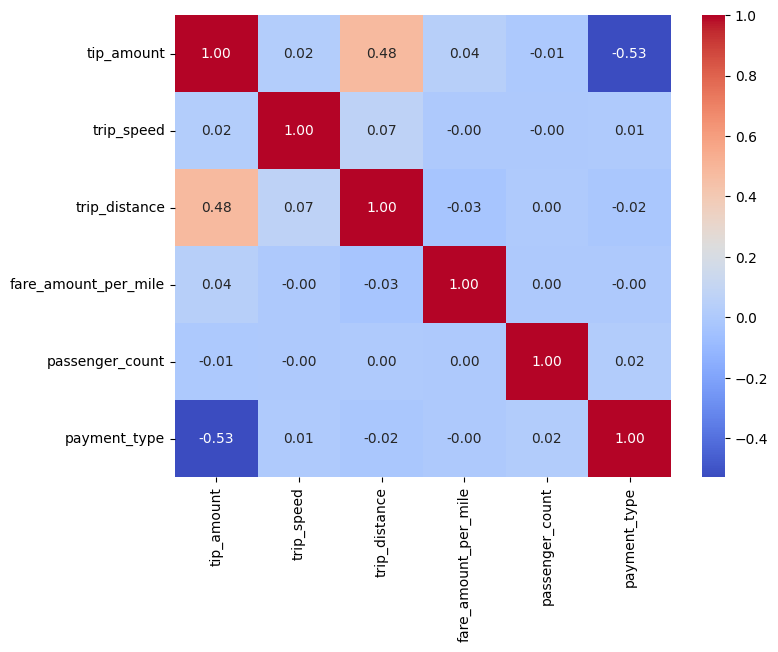

In [557]:
# explore only traditional payment types (credit card & cash)
df_reg_for_corr = df_regular[(df_regular['payment_type'] == 1) | (df_regular['payment_type'] == 2)]

# handle potential division by zero
df_reg_for_corr['trip_speed'] = np.where(df_reg_for_corr['trip_duration_minutes'] == 0, np.nan, (df_reg_for_corr['trip_distance'] / df_reg_for_corr['trip_duration_minutes']).round(2))


corr_matrix = df_reg_for_corr[['tip_amount', 'trip_speed', 'trip_distance', 'fare_amount_per_mile', 'passenger_count', 'payment_type']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Under current conditions (filters, aggregation), there are no major takeaways from correlation values:
* It was expected slight negative relation between `tip_amount` and `payment_type` (1 = credit card, 2 = cash --> customers tip more when paying by card).
* slight positive relation between `trip_distance` and `tip_amount`--> also expected
* I was expecting a stronger correlation between `trip_speed` (which may somehow measure overall satisfaction of the customer) and `tip_amount`.